In [96]:
import pandas as pd
import glob
import numpy as np
from numpy import nan
from sklearn.impute import SimpleImputer
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
import math
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.activations import *

Using TensorFlow backend.


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [53]:
all_files = glob.glob("station*.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)
    df = df.replace(999.90, np.nan)
    df = df.fillna(df.mode().iloc[0])
    df['SOURCE'] = filename

    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [54]:
frame.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN,SOURCE
752,2015,28.95,29.05,28.55,26.90,24.30,24.15,22.21,24.20,26.15,26.65,28.30,29.05,28.47,26.58,23.99,27.03,26.52,station_vitoria.csv
753,2016,27.85,30.00,28.95,28.50,25.70,23.15,23.80,24.25,24.95,24.80,25.50,27.60,28.97,27.72,23.73,25.08,26.37,station_vitoria.csv
754,2017,29.10,28.40,28.10,26.35,24.30,24.65,21.95,22.25,23.10,25.85,25.25,26.70,28.37,26.25,22.95,24.73,25.57,station_vitoria.csv
755,2018,28.60,27.50,28.35,25.95,24.45,24.25,24.25,23.30,24.80,25.50,25.95,27.25,27.60,26.25,23.93,25.42,25.80,station_vitoria.csv
756,2019,29.35,29.65,28.90,28.05,26.60,25.10,23.25,23.05,24.95,25.90,24.73,25.85,28.75,27.85,23.80,25.84,26.56,station_vitoria.csv


In [55]:
frame.SOURCE.unique()

array(['station_belem.csv', 'station_curitiba.csv',
       'station_fortaleza.csv', 'station_goiania.csv',
       'station_macapa.csv', 'station_manaus.csv', 'station_recife.csv',
       'station_rio.csv', 'station_salvador.csv', 'station_sao_luiz.csv',
       'station_sao_paulo.csv', 'station_vitoria.csv'], dtype=object)

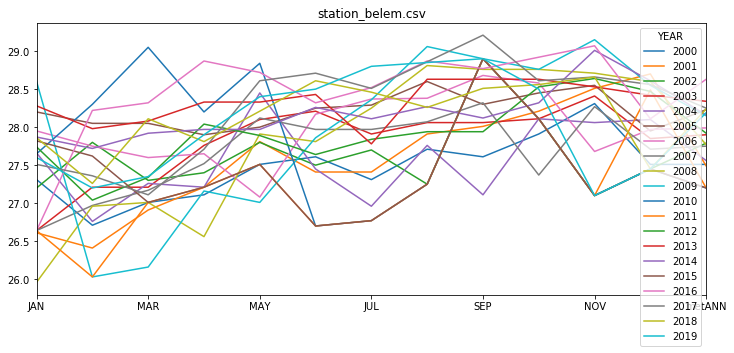

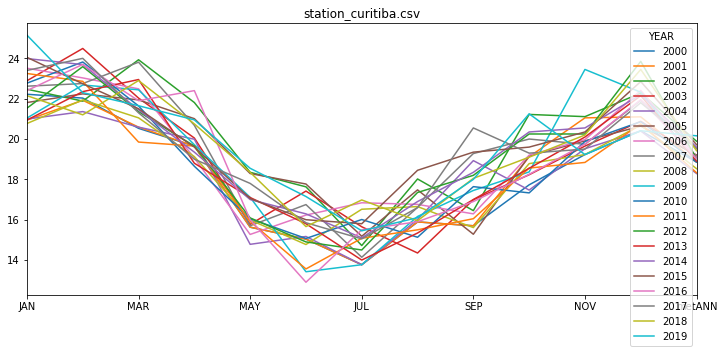

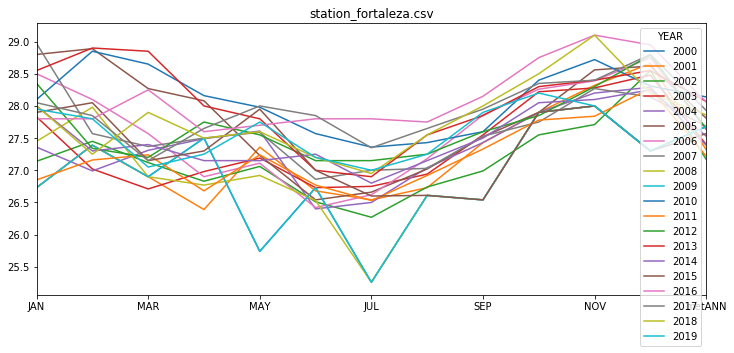

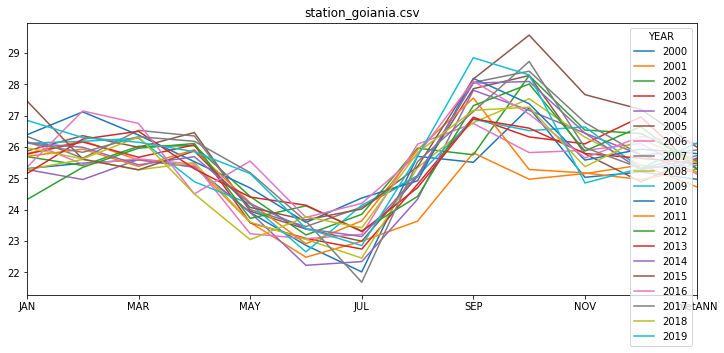

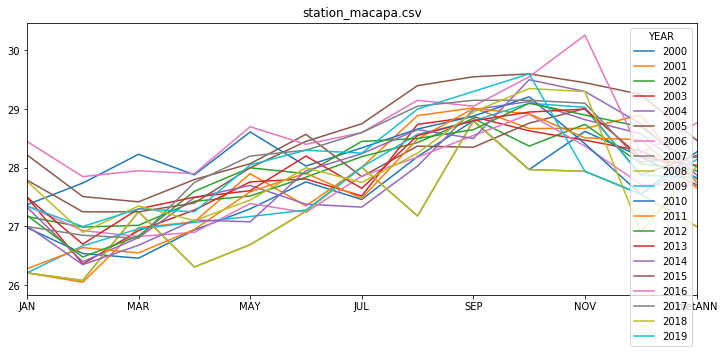

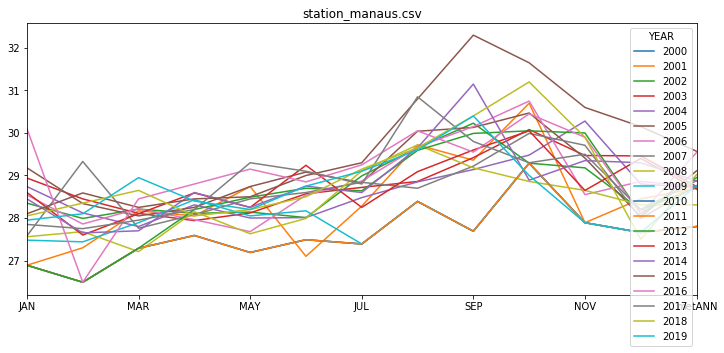

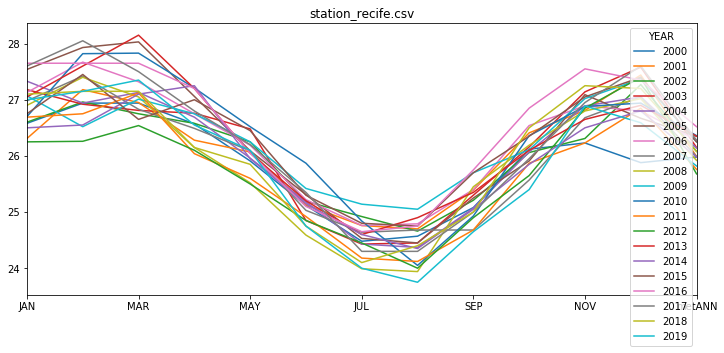

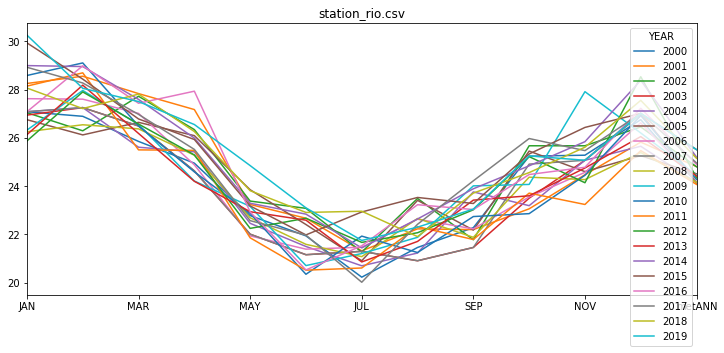

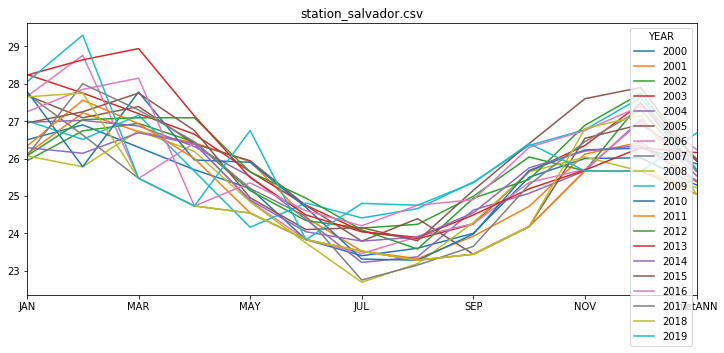

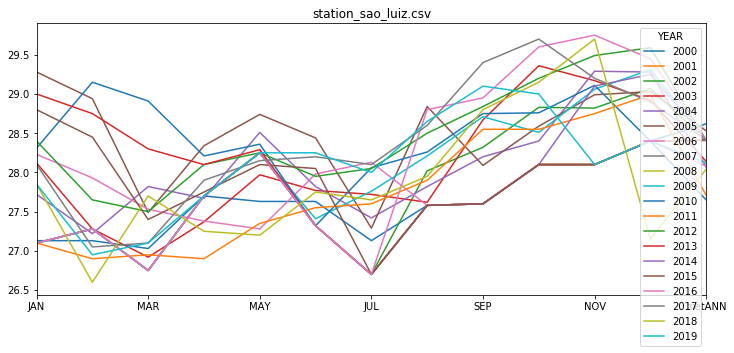

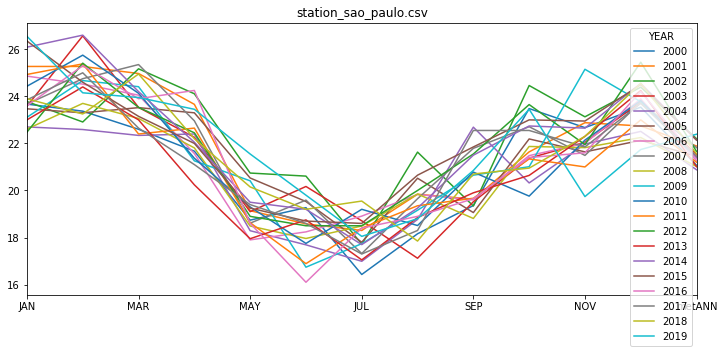

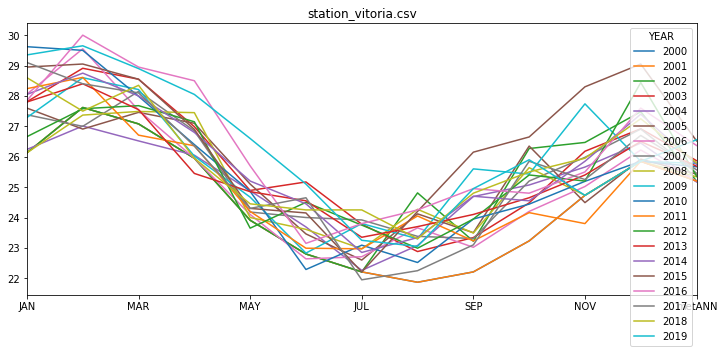

In [70]:
for i in frame.SOURCE.unique():
    df = frame[frame['SOURCE']==i]
    df.drop(['D-J-F','M-A-M','J-J-A','S-O-N'], axis=1, inplace=True)
    df = df.T
    df.columns = df.iloc[0]
    df.drop(['YEAR'], axis=0, inplace=True)
    
    #plt.figure(figsize=(18,12))
    df.iloc[:-1,-20:].plot(figsize=(12,5), title=i)

In [57]:
df

YEAR,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
JAN,26.43,26.3,26.25,25.7,26.64,26.64,26.55,25.99,26.64,26.7,...,29.62,28.24,26.66,27.8,28.05,28.95,27.85,29.1,28.6,29.35
FEB,25.53,26.06,26.03,25.52,26.03,26.03,25.99,26.03,27.11,26.99,...,29.5,28.61,27.58,28.4,28.75,29.05,30,28.4,27.5,29.65
MAR,25.88,26.15,26.02,25.41,27.01,27.01,25.93,25.74,27.34,26.63,...,27.99,26.71,27.68,27.55,28,28.55,28.95,28.1,28.35,28.9
APR,26.07,26.04,26.42,25.75,27.21,27.21,26.24,27.21,27.58,27.11,...,26.4,26.36,27.15,25.45,26.8,26.9,28.5,26.35,25.95,28.05
MAY,26.31,26.83,27.17,26.55,27.51,27.51,26.33,27.51,27.9,27.16,...,24.86,24.2,23.65,24.85,25.2,24.3,25.7,24.3,24.45,26.6
JUN,26.64,26.74,26.94,26.91,26.7,26.7,26.43,26.38,27.72,26.76,...,22.29,22.99,24.5,24.55,24.45,24.15,23.15,24.65,24.25,25.1
JUL,26.77,26.71,26.93,27.16,26.77,26.77,26.19,26.67,27.01,26.77,...,23.09,22.97,23.75,23.35,22.85,22.21,23.8,21.95,24.25,23.25
AUG,26.72,26.94,26.98,27.34,27.25,27.25,26,26.76,27.27,26.82,...,22.52,24.05,22.99,23.7,23.34,24.2,24.25,22.25,23.3,23.05
SEP,26.62,26.87,26.96,27.32,28.9,28.9,28.9,26.86,26.97,26.34,...,23.95,23.23,23.95,24.1,24.7,26.15,24.95,23.1,24.8,24.95
OCT,26.46,26.8,26.85,28.11,28.11,28.11,26.01,26.94,27.06,26.76,...,24.44,24.16,25.4,24.65,24.55,26.65,24.8,25.85,25.5,25.9


In [64]:
lista = []
for i in frame.SOURCE.unique():
    df = frame[frame['SOURCE']==i]
    df = pd.melt(df, id_vars=['YEAR','metANN', 'SOURCE'], value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC',], 
                            var_name='month',value_name='Temp')
    df['Date'] = pd.to_datetime(df['YEAR'].astype(str)+'/'+df['month'].astype(str)+'/01')
    df.drop(['YEAR','month'],axis=1,inplace=True)
    lista.append(df)

temperature = pd.concat(lista, axis=0, ignore_index=True)

In [66]:
temperature.sort_values(by='Date',inplace=True)

In [73]:
temperature.head()

,metANN,SOURCE,Temp,Date
3468,27.55,station_manaus.csv,27.29,1910-01-01
3578,27.55,station_manaus.csv,26.99,1910-02-01
3688,27.55,station_manaus.csv,26.49,1910-03-01
3798,27.55,station_manaus.csv,26.19,1910-04-01
3908,27.55,station_manaus.csv,27.19,1910-05-01


In [75]:
data = temperature.drop(['metANN'], axis=1)

In [76]:
data.dtypes

SOURCE            object
Temp             float64
Date      datetime64[ns]
dtype: object

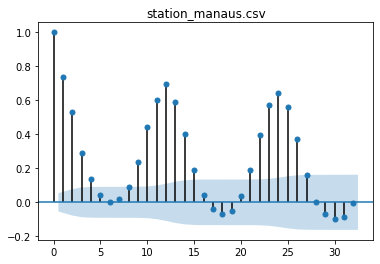

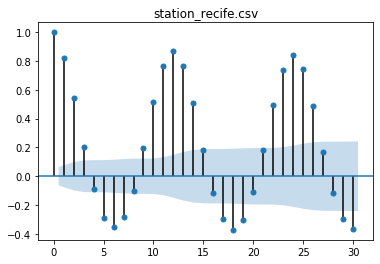

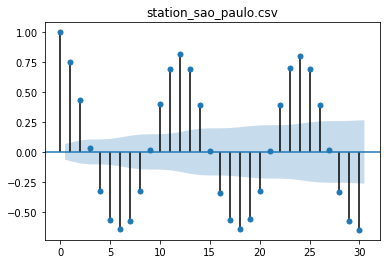

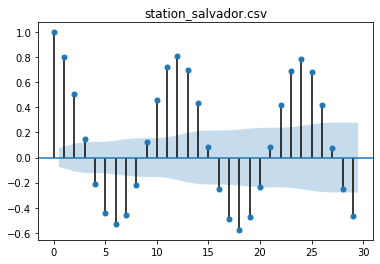

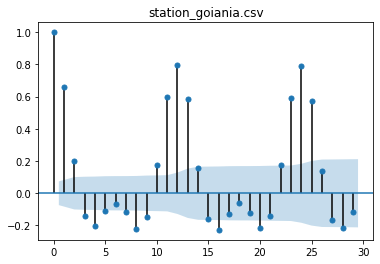

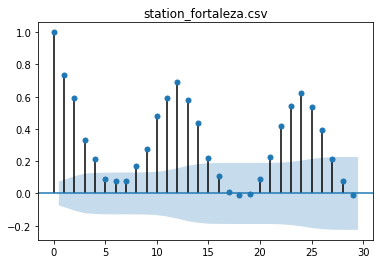

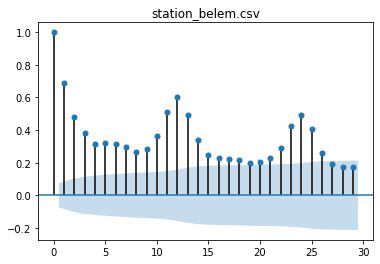

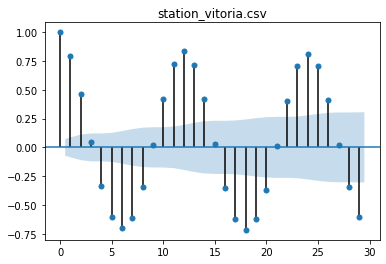

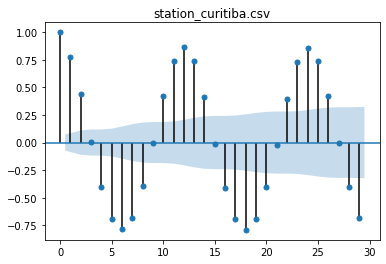

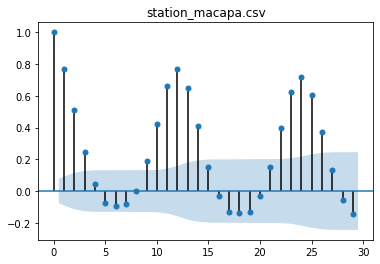

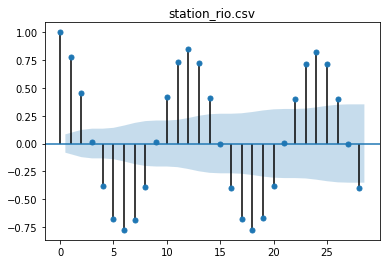

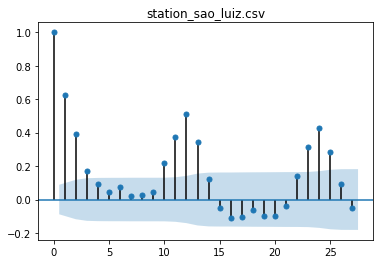

In [80]:
for i in data.SOURCE.unique():
    x = data[data['SOURCE']==i]
    x = x[['Temp']]
    plot_acf(x)
    pyplot.title(i)
    pyplot.show()

In [81]:
curitiba = data[data['SOURCE']=='station_curitiba.csv']
curitiba = curitiba[['Temp']].to_numpy()


In [82]:
curitiba

array([[21.8 ],
       [21.84],
       [20.51],
       [19.14],
       [16.05],
       [14.87],
       [15.43],
       [17.17],
       [18.56],
       [19.53],
       [20.56],
       [20.81],
       [20.47],
       [20.29],
       [20.78],
       [17.42],
       [14.49],
       [12.19],
       [12.29],
       [14.85],
       [16.46],
       [15.48],
       [19.07],
       [20.01],
       [22.57],
       [21.41],
       [22.06],
       [18.82],
       [15.71],
       [13.76],
       [15.62],
       [16.2 ],
       [19.65],
       [18.5 ],
       [20.37],
       [19.79],
       [21.33],
       [21.57],
       [20.29],
       [19.26],
       [15.46],
       [13.03],
       [12.08],
       [14.97],
       [16.93],
       [17.28],
       [17.76],
       [19.47],
       [20.31],
       [21.99],
       [19.11],
       [18.61],
       [15.12],
       [16.17],
       [13.94],
       [16.55],
       [17.66],
       [18.23],
       [19.84],
       [20.92],
       [22.3 ],
       [22.84],
       [

In [85]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [86]:
look_back = 6
trainX, trainY = create_dataset(curitiba, look_back)

In [90]:
trainY = curitiba[:-7, :]

In [94]:
#guardar uma parte do dataset para teste
X_train = trainX[:int(trainX.shape[0]*0.90)]

y_train = trainY[:int(trainY.shape[0]*0.90)]

X_test = trainX[int(trainX.shape[0]*0.90):]
y_test = trainY[int(trainY.shape[0]*0.90):]

In [99]:
# Multilayer Perceptron 

def create_model(activation, optimizer, dropout_rate):
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(36, 
                    input_dim=look_back, kernel_initializer=init_mode, activation=activation
                    ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation=activation)) 
    model.add(Dense(1, kernel_initializer=init_mode))
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer, 
                  metrics=['mean_absolute_error'])
    return model

# create model
model = KerasRegressor(build_fn=create_model, verbose=1, batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
from sklearn.model_selection import cross_val_score

# Use scikit-learn to grid search 
seed =7
np.random.seed(seed)
look_back = 6
activation =  ['relu', 'tanh', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.4, 0.8]
learn_rate = [0.001, 0.01]
dropout_rate = [0.0, 0.2, 0.4]
weight_constraint=[1, 2]
neuronss = [1, 5, 10]
neuronse = [12, 24, 36]
init_mode='uniform'
optimizer = [ 'SGD', 'Adam']
##############################################################
# grid search epochs, batch size
epochs = [10, 20, 30] # add 50, 100, 150 etc
batch_size = [5, 20] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
##############################################################
tscv = TimeSeriesSplit(n_splits=4)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=tscv, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train) 
score = cross_val_score(grid, 
                         X_train, y_train, cv=tscv)

##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

C:\Users\pati_\AppData\Roaming\Python\Python37\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
630/630 [==============================] - 0s 539us/step - loss: 162.5046 - mean_absolute_error: 10.7679
Epoch 2/30
630/630 [==============================] - 0s 136us/step - loss: 8.5779 - mean_absolute_error: 2.5572
Epoch 3/30
630/630 [==============================] - 0s 143us/step - loss: 7.4666 - mean_absolute_error: 2.3691
Epoch 4/30
630/630 [==============================] - 0s 150us/step - loss: 6.2342 - mean_absolute_error: 2.1672
Epoch 5/30
630/630 [==============================] - 0s 158us/step - loss: 4.9220 - mean_absolute_error: 1.9048
Epoch 6/30
630/630 [==============================] - 0s 159us/step - loss: 3.4495 - mean_absolute_error: 1.5782
Epoch 7/30
630/630 [==============================] - 0s 150us/step - loss: 2.0796 - mean_absolute_error: 1.2099
Epoch 8/30
630/630 [==============================] - 0s 148us/step - loss: 1.2514 - mean_absolute_error: 0.9291
Epoch 9/30
630/630 [==============================] - 0s 151us/step - loss: 0.8548 - mean_abs

C:\Users\pati_\AppData\Roaming\Python\Python37\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
252/252 [==============================] - 0s 1ms/step - loss: 307.5389 - mean_absolute_error: 17.2734
Epoch 2/30
252/252 [==============================] - 0s 164us/step - loss: 100.2712 - mean_absolute_error: 8.5293
Epoch 3/30
252/252 [==============================] - 0s 151us/step - loss: 9.1517 - mean_absolute_error: 2.6356
Epoch 4/30
252/252 [==============================] - 0s 153us/step - loss: 8.4568 - mean_absolute_error: 2.5284
Epoch 5/30
252/252 [==============================] - 0s 156us/step - loss: 7.9579 - mean_absolute_error: 2.4264
Epoch 6/30
252/252 [==============================] - 0s 154us/step - loss: 7.6723 - mean_absolute_error: 2.4102
Epoch 7/30
252/252 [==============================] - 0s 157us/step - loss: 7.1028 - mean_absolute_error: 2.2871
Epoch 8/30
252/252 [==============================] - 0s 160us/step - loss: 6.7178 - mean_absolute_error: 2.2100
Epoch 9/30
252/252 [==============================] - 0s 156us/step - loss: 6.4104 - mean_abs

C:\Users\pati_\AppData\Roaming\Python\Python37\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
378/378 [==============================] - 0s 746us/step - loss: 225.4513 - mean_absolute_error: 14.1499
Epoch 2/30
378/378 [==============================] - 0s 145us/step - loss: 10.0458 - mean_absolute_error: 2.7044
Epoch 3/30
378/378 [==============================] - 0s 153us/step - loss: 7.9295 - mean_absolute_error: 2.4465
Epoch 4/30
378/378 [==============================] - 0s 152us/step - loss: 7.0788 - mean_absolute_error: 2.3083
Epoch 5/30
378/378 [==============================] - 0s 159us/step - loss: 6.3300 - mean_absolute_error: 2.1810
Epoch 6/30
378/378 [==============================] - 0s 155us/step - loss: 5.5830 - mean_absolute_error: 2.0243
Epoch 7/30
378/378 [==============================] - 0s 155us/step - loss: 4.8026 - mean_absolute_error: 1.8917
Epoch 8/30
378/378 [==============================] - 0s 160us/step - loss: 4.0734 - mean_absolute_error: 1.7276
Epoch 9/30
378/378 [==============================] - 0s 165us/step - loss: 3.3186 - mean_ab

C:\Users\pati_\AppData\Roaming\Python\Python37\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/30
504/504 [==============================] - 0s 573us/step - loss: 163.6604 - mean_absolute_error: 10.8867
Epoch 2/30
504/504 [==============================] - 0s 158us/step - loss: 8.3409 - mean_absolute_error: 2.5275
Epoch 3/30
504/504 [==============================] - 0s 163us/step - loss: 7.3057 - mean_absolute_error: 2.3418
Epoch 4/30
504/504 [==============================] - 0s 173us/step - loss: 6.3142 - mean_absolute_error: 2.1787
Epoch 5/30
504/504 [==============================] - 0s 165us/step - loss: 5.1700 - mean_absolute_error: 1.9508
Epoch 6/30
504/504 [==============================] - 0s 173us/step - loss: 4.1767 - mean_absolute_error: 1.7558
Epoch 7/30
504/504 [==============================] - 0s 164us/step - loss: 3.1694 - mean_absolute_error: 1.5071
Epoch 8/30
504/504 [==============================] - 0s 175us/step - loss: 2.3538 - mean_absolute_error: 1.2912
Epoch 9/30
504/504 [==============================] - 0s 169us/step - loss: 1.5906 - mean_abs

In [101]:
#Best: -0.657217 using {'activation': 'linear', 'batch_size': 5, 'dropout_rate': 0.2, 'epochs': 30, 'optimizer': 'Adam'}

In [102]:
model = Sequential()
model.add(Dense(36, 
                input_dim=6, kernel_initializer='uniform', activation='linear'
                ))
model.add(Dropout(0.2))
model.add(Dense(10, activation='linear')) 
model.add(Dense(1, kernel_initializer='uniform'))
# Compile model
model.compile(loss='mean_squared_error', 
              optimizer='Adam', 
              metrics=['mean_absolute_error'])



model.fit(X_train , y_train, epochs=30, batch_size=5)

Epoch 1/30
630/630 [==============================] - 0s 580us/step - loss: 104.7826 - mean_absolute_error: 7.7372
Epoch 2/30
630/630 [==============================] - 0s 153us/step - loss: 11.1255 - mean_absolute_error: 2.7852
Epoch 3/30
630/630 [==============================] - 0s 156us/step - loss: 8.5843 - mean_absolute_error: 2.4211
Epoch 4/30
630/630 [==============================] - 0s 159us/step - loss: 6.9309 - mean_absolute_error: 2.1593
Epoch 5/30
630/630 [==============================] - 0s 157us/step - loss: 4.7157 - mean_absolute_error: 1.7290
Epoch 6/30
630/630 [==============================] - 0s 160us/step - loss: 3.8641 - mean_absolute_error: 1.5691
Epoch 7/30
630/630 [==============================] - 0s 168us/step - loss: 3.2543 - mean_absolute_error: 1.4325
Epoch 8/30
630/630 [==============================] - 0s 167us/step - loss: 3.3449 - mean_absolute_error: 1.4527
Epoch 9/30
630/630 [==============================] - 0s 171us/step - loss: 3.1779 - mean_abs

In [103]:
y_pred = model.predict(X_test)

In [104]:
y_actual = pd.DataFrame(y_test, columns=['Atual'])

y_hat = pd.DataFrame(y_pred, columns=['Predito'])

In [105]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: 0.9898


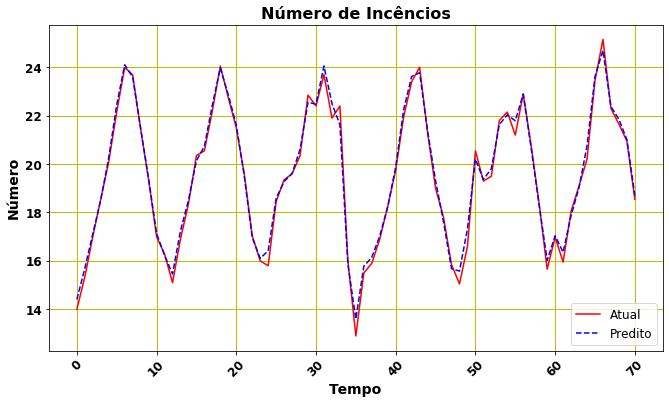

In [107]:
pyplot.figure(figsize=(11, 6))
pyplot.plot(y_actual, linestyle='solid', color='r')
pyplot.plot(y_hat, linestyle='dashed', color='b')

pyplot.legend(['Atual','Predito'], loc='best', prop={'size': 12})
pyplot.title('Número de Incêncios', weight='bold', fontsize=16)
pyplot.ylabel('Número', weight='bold', fontsize=14)
pyplot.xlabel('Tempo', weight='bold', fontsize=14)
pyplot.xticks(weight='bold', fontsize=12, rotation=45)
pyplot.yticks(weight='bold', fontsize=12)
pyplot.grid(color = 'y', linewidth='1')
pyplot.show()